In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report   #计算准确率召回率F1
from sklearn import preprocessing
#数据是否需要标准化
scale=False

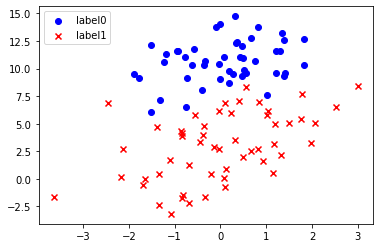

In [2]:
#载入数据
data=np.genfromtxt("LR-testSet.csv",delimiter=',')
x_data=data[:,:-1]  #这样选取比较通用化
y_data=data[:,-1]   #target

def plot():
    x0=[]
    x1=[]
    y0=[]
    y1=[]
    #切分不同类别的数据
    for i in range(len(x_data)):
        if y_data[i]==0:
            x0.append(x_data[i,0])#第一个特征
            y0.append(x_data[i,1])#第二个特征 
        else:
            x1.append(x_data[i,0])
            y1.append(x_data[i,1])
    #画图
    scatter0=plt.scatter(x0,y0,c='b',marker='o',label='label0')
    scatter1=plt.scatter(x1,y1,c='r',marker='x',label='label1')
    #画图例
    #plt.legend(handles=[scatter0,scatter1],labels=['label0','label1'],loc='best')
    plt.legend(loc='best')
plot()
plt.show()

In [53]:
y_data=data[:,-1,np.newaxis]
y_data.shape

(100, 1)

In [54]:
y_data=data[:,-1]
np.mat(y_data).shape

(1, 100)

In [55]:
y_data=data[:,-1]  #注意方括号层数
y_data

array([0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0.])

In [56]:
y_data.shape  #这是一维数组 不是 二维

(100,)

In [57]:
#数据处理，添加偏置项
x_data=data[:,:-1]

#这里注意要给y_data增加维度，让他也变成二维数据来适配函数mat
y_data=data[:,-1,np.newaxis]#相当于转置  1*100 turns to 100*1 .. np.newaxis的作用是增加一个维度
#y_data=data[:,-1]

print(np.mat(x_data).shape)
print(np.mat(y_data).shape)
#给样本添加偏置项
#concatenate函数可以改变axis的值来进行数据拼接
#axis的值为0时，不改变列数，将数据向下拼接
#axis的值为1时，不改变行数，将数据向右拼接
X_data=np.concatenate((np.ones((100,1)),x_data),axis=1)
print(X_data.shape)

(100, 2)
(100, 1)
(100, 3)


In [58]:
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

def cost(xMat,yMat,ws):  #ws相当于theta
    left = np.multiply(yMat, np.log(sigmoid(xMat*ws)))   #按位相乘
    right = np.multiply(1 - yMat, np.log(1 - sigmoid(xMat*ws)))
    #m = len(xMat)
    return np.sum(left + right) /(-len(xMat))

def gradAscent(xArr,yArr):
    # 将每一列特征标准化为标准正太分布，注意，标准化是针对每一列而言的
    if scale==True:
        xArr=preprocessng.scale(xArr)
        
    #将数据变成矩阵形式
    xMat=np.mat(xArr)
    yMat=np.mat(yArr)
    
    #定义学习率
    lr=0.001
    #定义循环次数
    epochs = 10000
    #将代价函数的值定义在一个列表
    costList = []
    # 计算数据行列数
    # 行代表数据个数，列代表权值个数
    m,n = np.shape(xMat)
    # 初始化权值
    ws = np.mat(np.ones((n,1)))
    
    for i in range(epochs+1):             
        # xMat和weights矩阵相乘
        h = sigmoid(xMat*ws)   
        # 计算误差
        #给xMat的矩阵进行转置，才能进行正常的矩阵乘法
        #h-yMat的格式是100*1，xMat.T的矩阵的格式是3*100
        ws_grad = xMat.T*(h - yMat)/m#即求偏导的化简最终形式
        #更新ws的值
        ws = ws - lr*ws_grad 
        #循环每进行50次，就将更新好的代价函数值代入
        if i % 50 == 0:
            costList.append(cost(xMat,yMat,ws))
    return ws,costList

In [59]:
# 训练模型，得到权值和cost值的变化
ws,costList = gradAscent(X_data, y_data)
#注意这里的X_data是大写字母
print(ws)
#print(costList)

[[ 2.05836354]
 [ 0.3510579 ]
 [-0.36341304]]


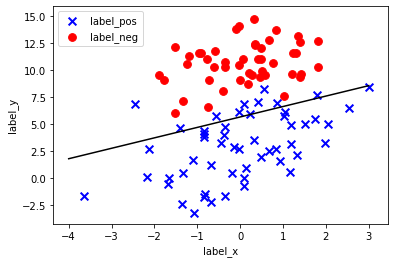

In [76]:

#fig = plt.figure()
axes = plt.subplot(1,1,1)
neg = data[:,2] == 0#由 布尔值组成的数组
pos = data[:,2] == 1

#plot()
x_test = [[-4],[3]]
y_test = (-ws[0] - x_test*ws[1])/ws[2]
plt.plot(x_test, y_test, 'k')

axes.scatter(data[pos][:,0],data[pos][:,1],marker='x',c='b',s=60,linewidth=2,label="label_pos")
axes.scatter(data[neg][:,0], data[neg][:,1], c='r', s=60, label="label_neg")

axes.set_xlabel("label_x")
axes.set_ylabel("label_y")
axes.legend(frameon= True, fancybox = True);

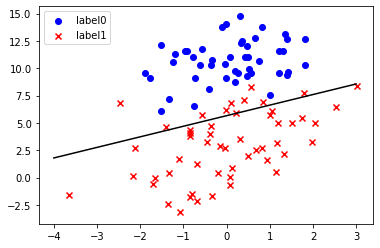

In [75]:
#不进行数据标准化时
if scale == False:
    # 画图决策边界
    plot()
    x_test = [[-4],[3]]
    y_test = (-ws[0] - x_test*ws[1])/ws[2]
    plt.plot(x_test, y_test, 'k')
    plt.show()

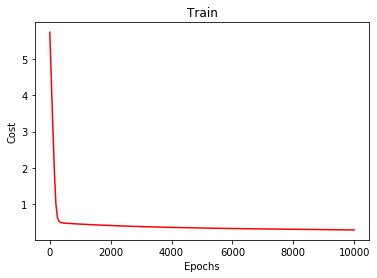

In [61]:
# 画图 loss值的变化
#定义图像范围
x = np.linspace(0,10000,201)   #10000/50
#给图像起名贴标签
plt.plot(x, costList, c='r')
plt.title('Train')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

In [8]:
# 预测
def predict(x_data, ws):
    if scale == True:
        x_data = preprocessing.scale(x_data)
    xMat = np.mat(x_data)
    ws = np.mat(ws)
    return [1 if x >= 0.5 else 0 for x in sigmoid(xMat*ws)]

predictions = predict(X_data, ws)
#classification_report计算准确率，召回率 
print(classification_report(y_data, predictions))

              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90        47
         1.0       1.00      0.81      0.90        53

    accuracy                           0.90       100
   macro avg       0.91      0.91      0.90       100
weighted avg       0.92      0.90      0.90       100

